# Simulation Result Analysor

In [1]:
from datetime import timedelta

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from matplotlib import rc

import matplotlib.font_manager as fm
fm._load_fontmanager()

sns.set_style("ticks")
font = {
    "font.family": "sans-serif",
    "font.size": 8,
}
plt.rcParams.update(font)

# 设置字体
paper_rc = {
    "lines.linewidth": 3,
    "lines.markersize": 10,
}
sns.set_context("paper", font_scale=1.6, rc=paper_rc)
current_palette = sns.color_palette()

pd.set_option("display.max_columns", None)


experiment_name = "Philly"
log_dir = f"../../log/{experiment_name}"
trace_dir = f'../data/Philly'

scheduler_ls = ['fifo', 'sjf', 'srtf', 'qssf']
placer = "random"
# vc_list = ['6214e9']
vc_list = list(pd.read_pickle(trace_dir+'/vc_dict_homo.pkl').keys())


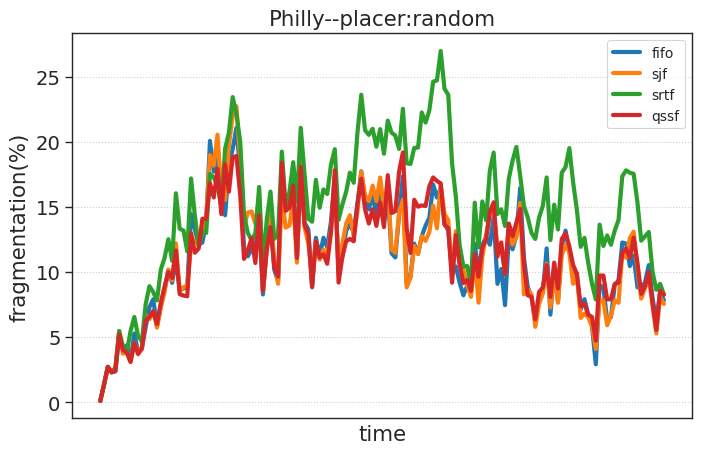

In [4]:
from scipy.interpolate import make_interp_spline

save = True
plt.figure(figsize=(8,5))

for scheduler in scheduler_ls:
	df = pd.read_csv(os.path.join(log_dir,f"all/{scheduler}_{placer}_all_seq.csv"))
	
	x = df['time']
	y = df['fragmentation_ration']*100
	x_smooth = np.linspace(x.min(), x.max(), 150)  # 生成300个点
	spl = make_interp_spline(x, y, k=3)  # Cubic interpolation (三次插值)
	y_smooth = spl(x_smooth)

	plt.plot(x_smooth, y_smooth, label=f"{scheduler}")

plt.title(f'Philly--placer:{placer}')
plt.xlabel('time')
plt.xticks([])
plt.ylabel('fragmentation(%)')
plt.legend(loc='best', fontsize=10)
plt.grid(linestyle=':')

if save:
	plt.savefig(f"/data/nihaifeng/philly_traces/figures/fragmentation_random.pdf", bbox_inches="tight", dpi=600)
else:
	plt.show()

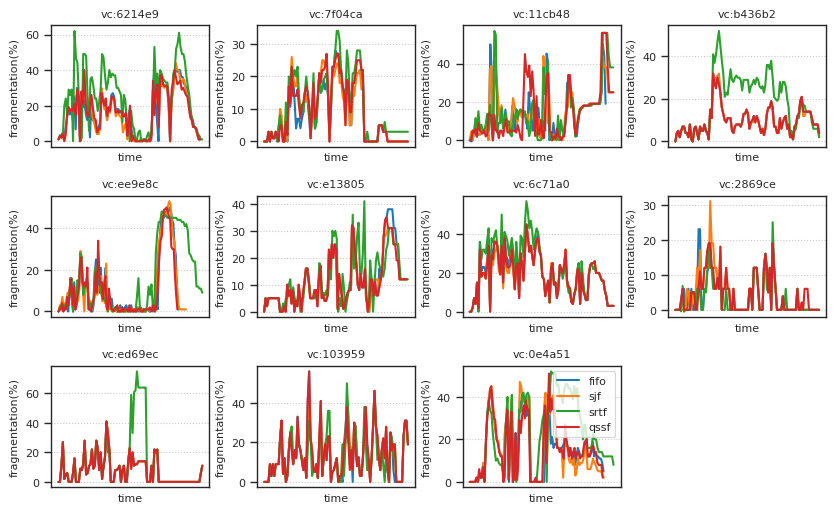

In [5]:
from scipy.interpolate import make_interp_spline

fig, axes = plt.subplots(3, 4, figsize=(10,6))
axes = axes.flatten() 

for idx, vc in enumerate(vc_list):
	ax = axes[idx]
	for scheduler in scheduler_ls:
		df = pd.read_csv(os.path.join(log_dir, f"{vc}/{scheduler}_{placer}_{vc}_seq.csv"))
		
		x = df['time']
		y = df['fragmentation_ration']*100
		x_smooth = np.linspace(x.min(), x.max(), 100)
		spl = make_interp_spline(x, y, k=3)  # Cubic interpolation (三次插值)
		y_smooth = spl(x_smooth)

		ax.plot(x_smooth, y_smooth, label=f"{scheduler}", linewidth=1.5)

	ax.set_title(f'vc:{vc}', fontsize=8)
	ax.set_xlabel('time', fontsize=8)
	ax.set_xticks([])
	ax.tick_params(axis='both', which='major', labelsize=8)
	ax.set_ylabel('fragmentation(%)', fontsize=8)
	ax.grid(linestyle=':')
	if idx == 10:
		ax.legend(loc='best', fontsize=8)


for i in range(len(vc_list), len(axes)):
    fig.delaxes(axes[i])

plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.savefig(f"/data/nihaifeng/philly_traces/figures/fragmentation_random_2.pdf", bbox_inches="tight", dpi=600)
# plt.show()


In [4]:
jct_avg = pd.read_csv(f"{log_dir}/jct_avg_{placer}.csv", index_col=0)
que_avg = pd.read_csv(f"{log_dir}/que_avg_{placer}.csv", index_col=0)
jct_avg

,fifo_random
6214e9,47027
7f04ca,133433
11cb48,62847
b436b2,28593
ee9e8c,202323
e13805,85655
6c71a0,30977
2869ce,70215
ed69ec,28345
103959,24719


In [5]:
que_avg

,fifo_random
6214e9,28184
7f04ca,1019
11cb48,54347
b436b2,405
ee9e8c,86449
e13805,722
6c71a0,109
2869ce,21171
ed69ec,28
103959,2367


## Bar: Queue Time

In [8]:
def bar_policies_comparison(df, xlabel, save):
    fig, ax = plt.subplots(figsize=(10, 3.8))
    off = 0.25 * (len(df) - 5)
    x = np.arange(1, len(df) + 1)
    width = 0.2

    labels = []
    for c in df.columns:
        labels.append(c.split("_")[0])
    placer = c.split("_")[1]

    for i in range(len(df.columns)):
        offset = i - off
        p1 = ax.bar(
            x + offset * width,
            df.iloc[:, i],
            width,
            alpha=0.9,
            linewidth=0.8,
            edgecolor="k",
            label=labels[i].upper(),
        )
    #         autolabel(p1, ax)

    ax.set_xlabel(f"{xlabel}")
    ax.set_ylabel(f"Average Queuing Time (s)")
    ax.set_xticks(x)
    ax.set_xlim(0.5, 11.5)
    ax.set_xticklabels(df.index.values)
    ax.ticklabel_format(axis="y", style="sci", scilimits=(-6, 2), useMathText=True)
    ax.legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.18),
        ncol=8,
        fancybox=True,
        shadow=True,
    )
    ax.grid(axis="y", linestyle=":")
    #     plt.suptitle(f'{experiment_name}_{xlabel}_{placer}')
    if save:
        fig.savefig(
            f"philly_bar_vc_queuetime.pdf", bbox_inches="tight", dpi=600
        )
    else:
        plt.show()

all_que = que_avg.loc['all']
que_avg = que_avg.drop(index='all')
que_avg.sort_values(by='fifo_random', ascending=False, inplace=True)
que_avg = que_avg.head(10)
que_avg = que_avg.append(all_que)

bar_policies_comparison(que_avg, xlabel=f"VCs in Philly", save=False)

KeyError: 'all'